In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

# eye candy plots
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle')


In [2]:
df = pd.read_csv("../../data/processed/aggregated_pueblos.csv")

In [3]:
df.province.unique()

array(['Álava', 'Albacete', 'Alicante', 'Almería', 'Ávila', 'Badajoz',
       'Illes Balears', 'Barcelona', 'Burgos', 'Cáceres', 'Cádiz',
       'Castellón', 'Ciudad Real', 'Córdoba', 'A Coruña', 'Cuenca',
       'Girona', 'Granada', 'Guadalajara', 'Gipuzkoa', 'Huelva', 'Huesca',
       'Jaén', 'León', 'Lleida', 'La Rioja', 'Lugo', 'Madrid', 'Málaga',
       'Murcia', 'Navarra', 'Ourense', 'Asturias', 'Palencia',
       'Palmas, Las', 'Pontevedra', 'Salamanca', 'Santa Cruz de Tenerife',
       'Cantabria', 'Segovia', 'Sevilla', 'Soria', 'Tarragona', 'Teruel',
       'Toledo', 'Valencia', 'Valladolid', 'Bizkaia', 'Zamora',
       'Zaragoza', 'Ceuta', 'Melilla'], dtype=object)

In [4]:
df = df.drop(df[df['province'].isin(["Illes Balears", "Santa Cruz de Tenerife", 'Palmas, Las'])].index)

# 1. Population

<Axes: xlabel='total_population', ylabel='Count'>

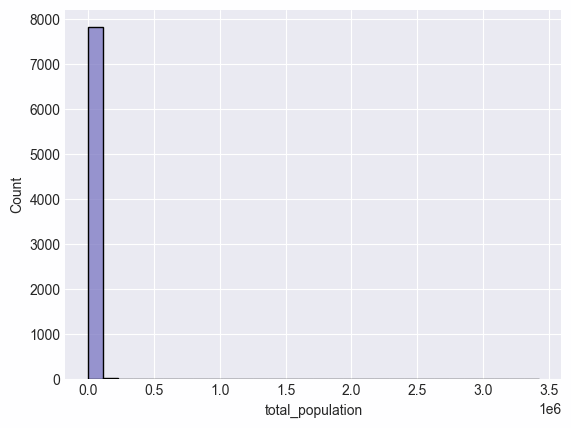

In [5]:
sns.histplot(df, x="total_population", bins=30)


<Axes: ylabel='total_population'>

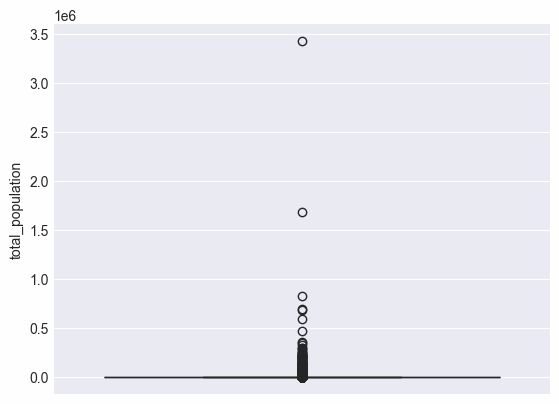

In [6]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [7]:
# Define function to print the whiskers of a boxplot

def calculate_whiskers(df, column):
    """
    Calculate the lower and upper whiskers for a specified column in a DataFrame.

    Parameters:
        df (pd.DataFrame): The DataFrame containing the data.
        column (str): The column name to calculate whiskers for.

    Returns:
        tuple: (lower_whisker, upper_whisker)
    """
    # Get descriptive statistics for the column
    stats = df[column].describe()
    Q1 = stats['25%']
    Q3 = stats['75%']
    IQR = Q3 - Q1

    # Calculate the lower whisker
    lower_whisker = max(
        df[column][df[column] >= (Q1 - 1.5 * IQR)].min(), 
        df[column].min()
    )
    
    # Calculate the upper whisker
    upper_whisker = min(
        df[column][df[column] <= (Q3 + 1.5 * IQR)].max(), 
        df[column].max()
    )
    
    return lower_whisker, upper_whisker

In [8]:
lower, upper = calculate_whiskers(df, "total_population")
print("Upper Whisker total population", upper)

Upper Whisker total population 5454


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7874 entries, 0 to 8024
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   cmun                       7874 non-null   int64  
 1   municipality               7874 non-null   object 
 2   province                   7874 non-null   object 
 3   autonomous_community       7874 non-null   object 
 4   altitude                   7874 non-null   float64
 5   longitude                  7874 non-null   float64
 6   latitude                   7874 non-null   float64
 7   0-17                       7874 non-null   int64  
 8   18-24                      7874 non-null   int64  
 9   25-34                      7874 non-null   int64  
 10  35-54                      7874 non-null   int64  
 11  55+                        7874 non-null   int64  
 12  male                       7874 non-null   int64  
 13  female                     7874 non-null   int64  
 1

In [10]:
df_cities = df.query("total_population > 20000")

In [11]:
title = "Cities in Spain"

lats = df_cities.latitude
lons = df_cities.longitude

fig = px.scatter_map(df_cities, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )

# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")

fig.show()

In [12]:
df_cities.to_csv("../../data/processed/split_cities.csv")

In [13]:
df_cities

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,...,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",count_of_stations,suburban_train
41,1059,Vitoria-Gasteiz,Álava,País Vasco,534.35820,-2.667893,42.84641,42947,17680,25583,...,0.99,0.01,0.99,0.98,0.99,1.0,1.00,0.97,NaN,NaN
50,2003,Albacete,Albacete,Castilla La Mancha,685.95730,-1.860070,38.99765,30616,13617,19673,...,0.97,0.90,1.00,0.95,0.92,1.0,0.99,0.96,1.0,0.0
56,2009,Almansa,Albacete,Castilla La Mancha,699.09230,-1.097517,38.86941,3927,1762,2567,...,0.87,0.00,1.00,0.92,0.00,1.0,0.92,0.00,1.0,0.0
84,2037,Hellín,Albacete,Castilla La Mancha,571.84380,-1.703310,38.51216,5362,2671,3788,...,0.96,0.68,1.00,0.92,0.91,1.0,0.95,0.07,5.0,0.0
128,2081,Villarrobledo,Albacete,Castilla La Mancha,728.52910,-2.607643,39.26726,4488,2121,2878,...,0.79,0.00,0.99,0.79,0.72,1.0,0.81,0.00,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8007,12009,Almassora,Castellón,Valencia,37.78706,-0.063318,39.94497,5641,2045,3191,...,0.84,0.66,1.00,0.76,0.73,1.0,1.00,0.72,1.0,1.0
8008,12028,Benicàssim/Benicasim,Castellón,Valencia,16.66872,0.065607,40.05554,3456,1438,1891,...,0.97,0.00,1.00,0.78,0.80,1.0,1.00,0.74,4.0,1.0
8009,12040,Castelló de la Plana,Castellón,Valencia,36.00000,-0.037671,39.98598,30730,13983,20003,...,0.98,0.86,1.00,0.98,0.98,1.0,1.00,0.97,2.0,1.0
8019,46220,Sagunt/Sagunto,Valencia,Valencia,56.38033,-0.277977,39.68077,12154,5394,7482,...,0.99,0.78,0.99,0.92,0.96,1.0,1.00,0.54,2.0,1.0


In [14]:
df = df.query("total_population <= 6000")

<Axes: xlabel='total_population', ylabel='Count'>

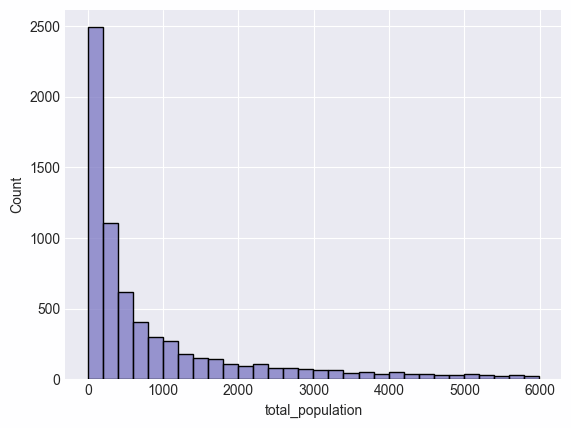

In [15]:
sns.histplot(df, x="total_population", bins=30)

<Axes: ylabel='total_population'>

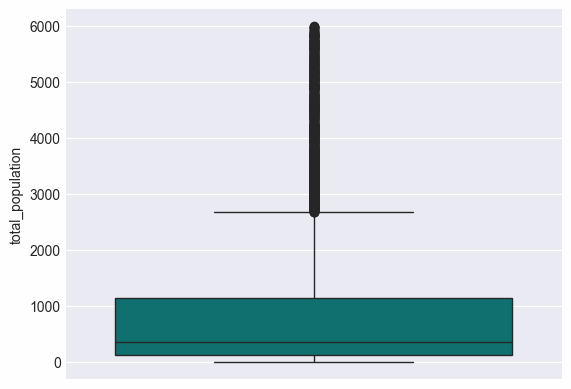

In [16]:
# Plotting the boxplot
sns.boxplot(df["total_population"], color="teal")

In [17]:
df

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,...,ftth,hfc,reception_30mbps,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",count_of_stations,suburban_train
0,1001,Alegría-Dulantzi,Álava,País Vasco,561.68570,-2.513507,42.84149,615,250,268,...,0.99,0.00,1.00,0.81,0.15,1.00,0.01,0.0,NaN,NaN
2,1003,Aramaio,Álava,País Vasco,381.87970,-2.566000,43.05400,218,113,108,...,0.85,0.00,0.89,0.78,0.84,1.00,0.60,0.0,NaN,NaN
3,1004,Artziniega,Álava,País Vasco,196.98080,-3.128209,43.12220,352,127,146,...,0.87,0.00,0.98,0.95,0.97,1.00,0.84,0.0,NaN,NaN
4,1006,Armiñón,Álava,País Vasco,463.58150,-2.872574,42.72305,42,20,18,...,0.87,0.00,0.99,0.84,0.90,0.96,0.00,0.0,NaN,NaN
5,1009,Asparrena,Álava,País Vasco,631.65200,-2.321000,42.89567,229,110,145,...,0.87,0.00,0.97,0.86,0.88,1.00,0.95,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,46180,Novetlè,Valencia,Valencia,135.76780,-0.547913,38.97980,150,61,75,...,0.94,0.81,1.00,0.91,0.88,1.00,1.00,0.0,NaN,NaN
8020,12072,Llucena/Lucena del Cid,Castellón,Valencia,564.10640,-0.279997,40.13850,176,98,137,...,0.88,0.00,0.99,0.89,0.89,0.98,0.93,0.0,NaN,NaN
8021,12901,"Alqueries, les/Alquerías del Niño Perdido",Castellón,Valencia,25.46689,-0.113446,39.89653,827,327,409,...,0.95,0.00,1.00,0.95,0.95,1.00,0.96,0.0,NaN,NaN
8023,46176,Montroi/Montroy,Valencia,Valencia,142.12200,-0.614546,39.34037,563,217,394,...,0.52,0.00,1.00,0.37,0.06,0.98,0.75,0.0,NaN,NaN


In [18]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', '0-17', '18-24', '25-34', '35-54', '55+',
       'male', 'female', 'total_population', 'n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other',
       'nearest_airport', 'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses', 'vdsl_30mbps',
       'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps',
       'reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz',
       'count_of_stations', 'suburban_train'],
      dtype='object')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46],
 [Text(0, 0, 'Burgos'),
  Text(1, 0, 'Salamanca'),
  Text(2, 0, 'Guadalajara'),
  Text(3, 0, 'Zaragoza'),
  Text(4, 0, 'Ávila'),
  Text(5, 0, 'Navarra'),
  Text(6, 0, 'Zamora'),
  Text(7, 0, 'Teruel'),
  Text(8, 0, 'Cuenca'),
  Text(9, 0, 'Lleida'),
  Text(10, 0, 'Valladolid'),
  Text(11, 0, 'Cáceres'),
  Text(12, 0, 'Segovia'),
  Text(13, 0, 'León'),
  Text(14, 0, 'Huesca'),
  Text(15, 0, 'Girona'),
  Text(16, 0, 'Palencia'),
  Text(17, 0, 'Barcelona'),
  Text(18, 0, 'Valencia'),
  Text(19, 0, 'Toledo'),
  Text(20, 0, 'Soria'),
  Text(21, 0, 'La Rioja'),
  Text(22, 0, 'Tarragona'),
  Text(23, 0, 'Badajoz'),
  Text(24, 0, 'Granada'),
  Text(25, 0, 'Castellón'),
  Text(26, 0, 'Madrid'),
  Text(27, 0, 'Ciudad Real'),
  

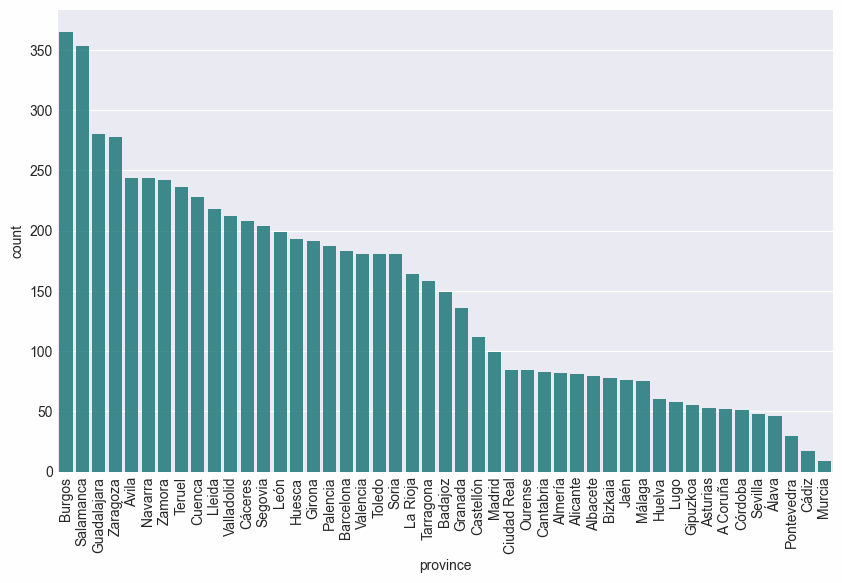

In [19]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "province",order=df["province"].value_counts().index, ax=ax1, color="teal", alpha = 0.8)
plt.xticks(rotation=90)


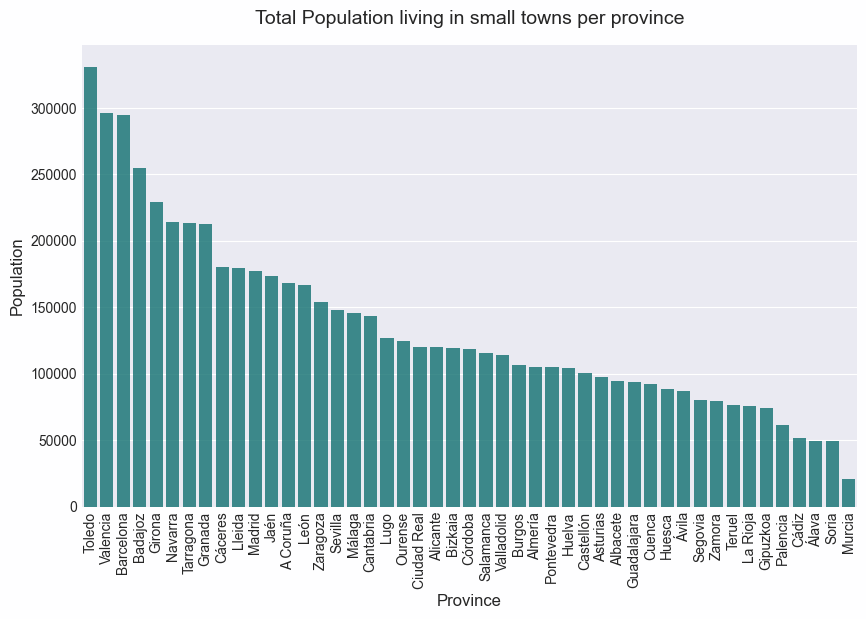

In [20]:
# Group by province and sum the total population
df_grouped = df.groupby("province", as_index=False)["total_population"].sum()

# Sort the grouped DataFrame by total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Population", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Total Population living in small towns per province", fontsize=14, pad=15)

plt.show()

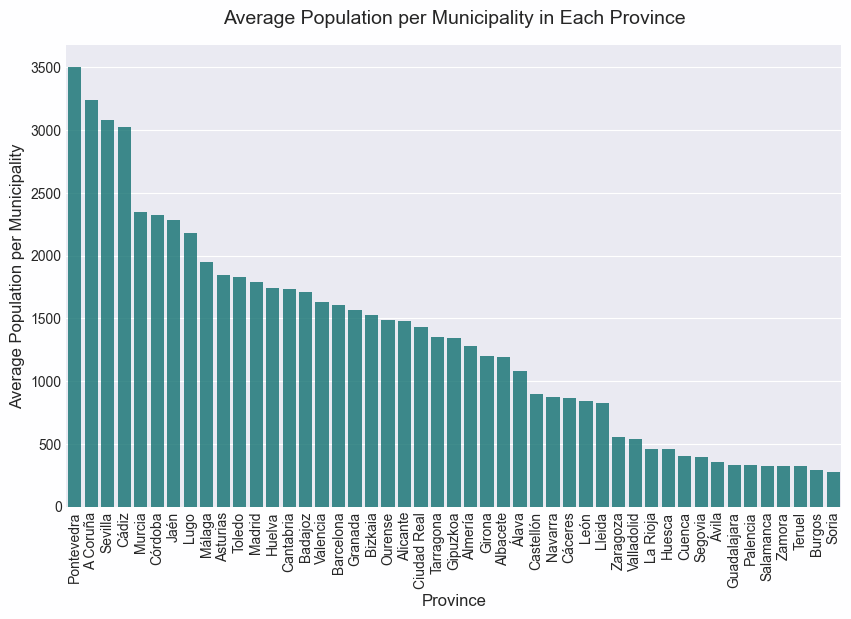

In [21]:
# Group by province and calculate the average population per municipality
df_grouped = df.groupby("province", as_index=False)["total_population"].mean()

# Sort the grouped DataFrame by average total_population in descending order
df_sorted = df_grouped.sort_values(by="total_population", ascending=False)

# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart with ordered categories
sns.barplot(x=df_sorted.province, y=df_sorted.total_population, ax=ax1, color="teal", order=df_sorted.province, alpha = 0.8)

ax1.set_ylabel("Average Population per Municipality", fontsize=12)
ax1.set_xlabel("Province", fontsize=12)
ax1.tick_params(axis='y')
ax1.tick_params(axis='x', rotation=90)
ax1.set_title("Average Population per Municipality in Each Province", fontsize=14, pad=15)

plt.show()


In [22]:
# Define function to categorize connectivity levels
def categorize_population(size):
    if size >= 3000:
        return "Big"
    elif size >= 500:
        return "Medium"
    elif size >= 100:
        return "Small"
    else:
        return "Very Small"

# Apply the function to create a new column
df["town_size"] = df["total_population"].apply(categorize_population)

In [23]:
order = ["Very Small", "Small", "Medium", "Big"]

<Axes: xlabel='town_size', ylabel='count'>

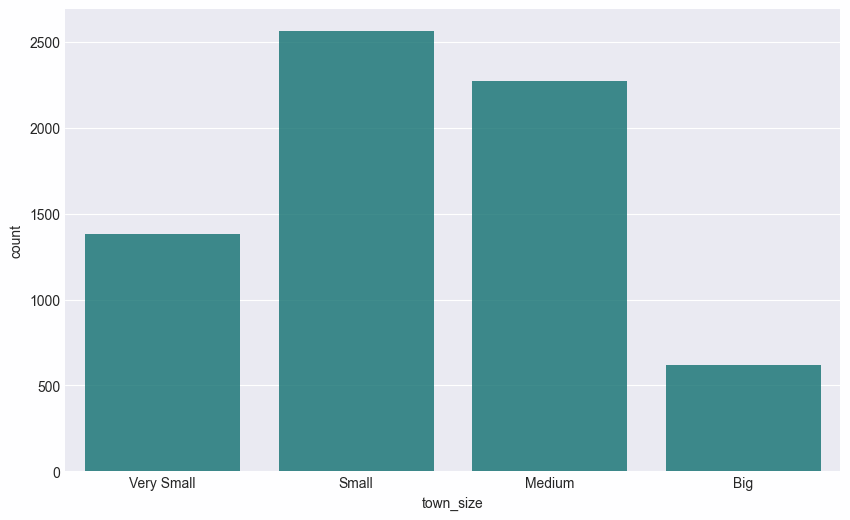

In [24]:
# Create the figure and first y-axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar chart for total cost
sns.countplot(data=df, x= "town_size",order=order, ax=ax1, color="teal", alpha = 0.8)

# 2. Connectivity

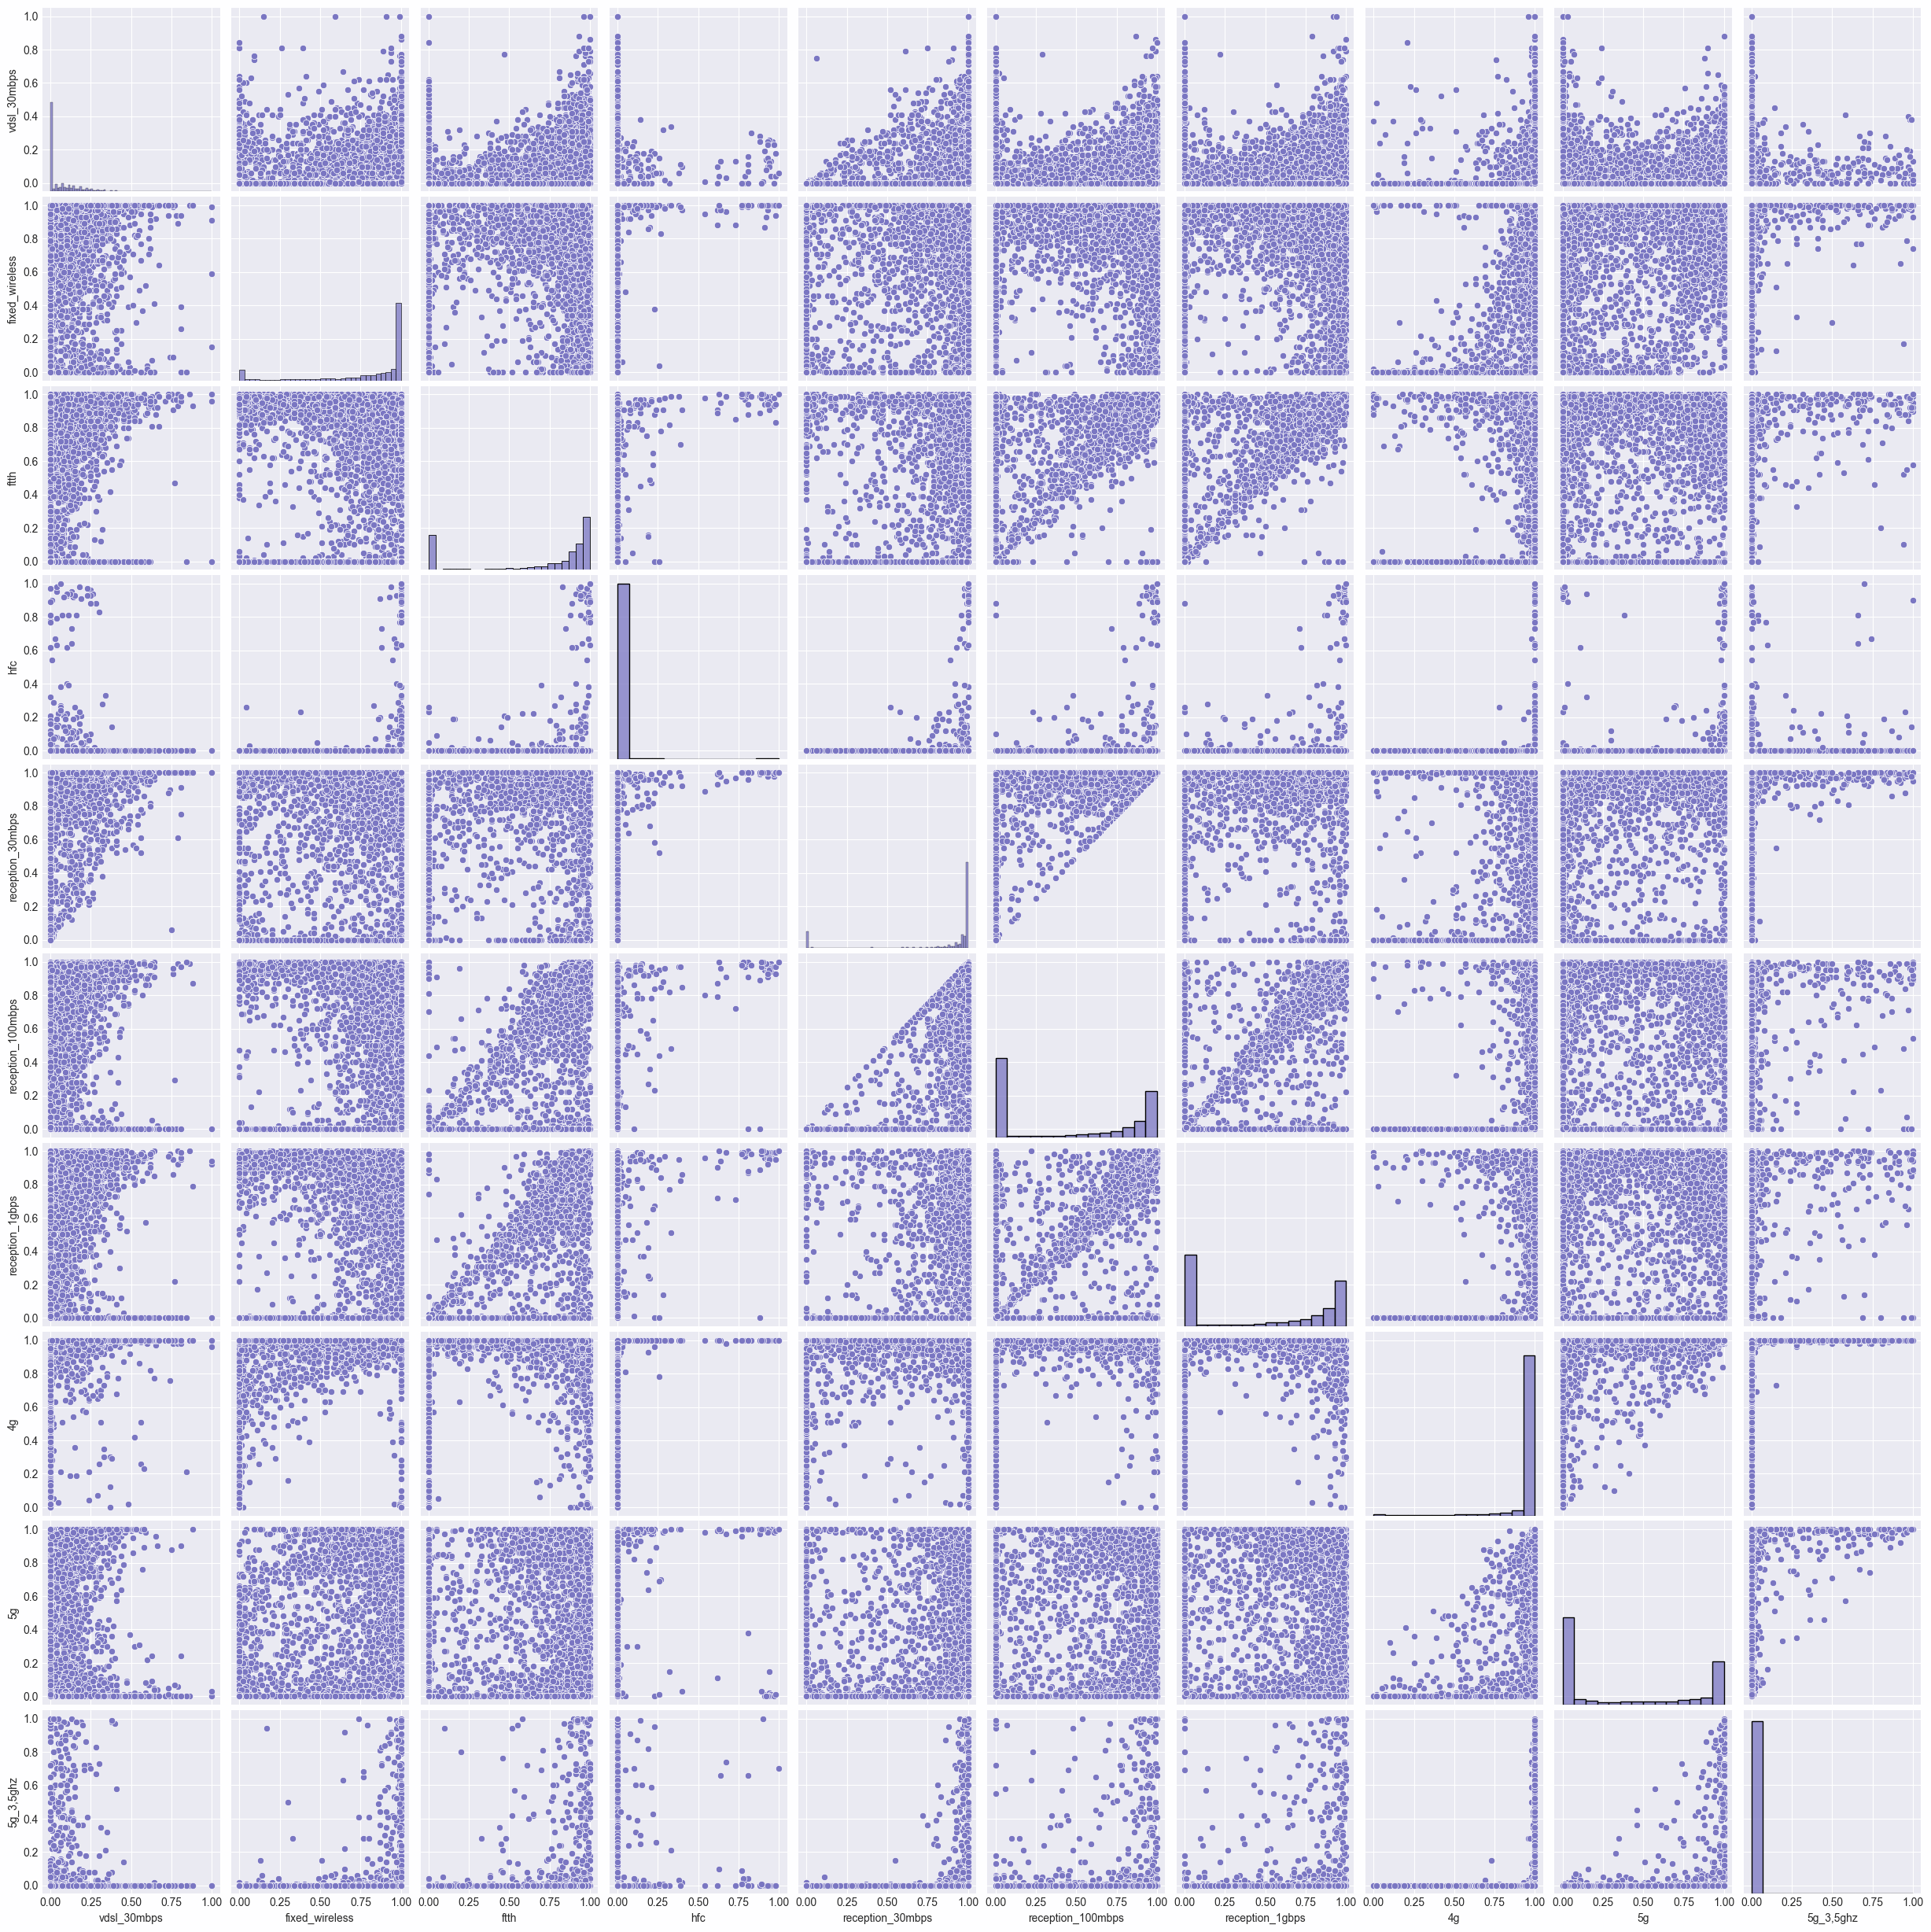

In [25]:
# Group by province and calculate the average population per municipality
df_connectivity = df[['vdsl_30mbps', 'fixed_wireless', 'ftth', 'hfc', 'reception_30mbps','reception_100mbps', 'reception_1gbps', '4g', '5g', '5g_3,5ghz']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


### Meanings of the Connectivity Indicators:

Each of these refers to a different type of broadband or mobile network connectivity in a town. Here's what they mean:

- **vdsl_30mbps** → Availability of VDSL (Very-high-bit-rate Digital Subscriber Line) at 30 Mbps. A faster version of DSL that uses telephone lines.

- **fixed_wireless** → Percentage of coverage by Fixed Wireless Access (FWA), which provides broadband via radio signals instead of cables.

- **ftth** → Fiber-to-the-Home (FTTH) availability, meaning direct fiber optic connections to residences (highest speed and reliability).

- **hfc** → Hybrid Fiber-Coaxial (HFC) availability, a mix of fiber optics and coaxial cable (used in cable internet services).

- **reception_30mbps** → Percentage of the area that can receive at least 30 Mbps (regardless of technology).

- **reception_100mbps** → Percentage of the area that can receive at least 100 Mbps.

- **reception_1gbps** → Percentage of the area that can receive at least 1 Gbps (1000 Mbps).

- **4g** → Coverage of 4G mobile network.

- **5g** → Coverage of 5G mobile network (general).

- **5g_3,5ghz** → Coverage of 5G at 3.5 GHz, a specific frequency band that offers higher speeds and lower latency.


**The 3 Most Important Metrics to Define Connectivity in a Town:**

>**ftth** (Fiber-to-the-Home)
>- Why? It's the gold standard for broadband, offering the fastest speeds, low latency, and high reliability.
>- Key Impact: Towns with high FTTH coverage have superior internet quality.

>**reception_100mbps** or **reception_1gbps**
>- Why? This metric shows how much of the town has access to fast internet speeds (regardless of the technology).
>- Key Impact: Ensures people and businesses can get modern broadband speeds.

>**5g** or **5g_3,5ghz**
>- Why? 5G is essential for mobile and future-proof connectivity (low latency, high-speed mobile broadband).
>- Key Impact: Towns with strong 5G networks can support smart city applications, IoT, and next-gen mobile services.

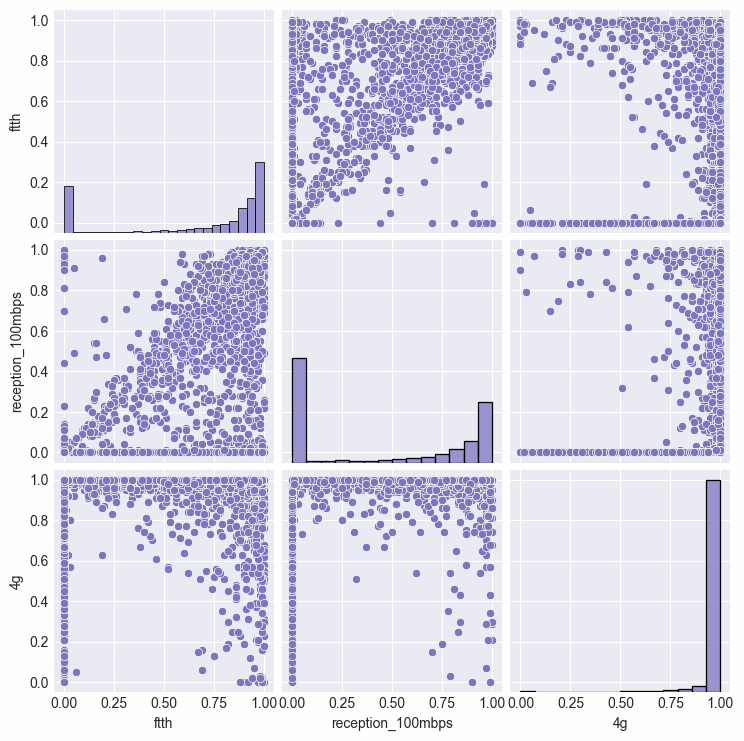

In [26]:
# Group by province and calculate the average population per municipality
df_connectivity = df[[ 'ftth','reception_100mbps', '4g']]

# Plot the bar chart with ordered categories
sns.pairplot(df_connectivity)


| **Factor**            | **New Weight (%)** | **Reasoning** |
|-----------------------|-------------------|--------------|
| `ftth`               | **50%**            | Fiber is the most important for stable, high-speed connectivity. |
| `reception_100mbps`  | **35%**            | Ensures fast broadband availability, even if not fiber. |
| `4g`                 | **15%**            | Still essential for mobile broadband, but not the primary factor. |

In [27]:
# Define new weights
weights = {
    'ftth': 0.5,
    'reception_100mbps': 0.35,
    '4g': 0.15
}

# Compute the adjusted Connectivity Score
df["connectivity_score"] = (
    df["ftth"] * weights["ftth"] +
    df["reception_100mbps"] * weights["reception_100mbps"] +
    df["4g"] * weights["4g"]
)


### **Connectivity Score Categories**
| **Score Range**  | **Category**          | **Description** |
|------------------|----------------------|----------------|
| **80 - 100**     | **Excellent**         | Strong fiber coverage and high-speed internet. |
| **60 - 79**      | **Good**              | Decent broadband with fiber or high-speed non-fiber options. |
| **40 - 59**      | **Moderate**          | Some high-speed coverage, but fiber may be limited. |
| **20 - 39**      | **Weak**              | Basic connectivity with limited high-speed access. |
| **0 - 19**       | **Poor**              | Very poor or no access to high-speed internet. |

In [28]:
# Define function to categorize connectivity levels
def categorize_connectivity(score):
    if score >= 0.8:
        return "Excellent"
    elif score >= 0.6:
        return "Good"
    elif score >= 0.4:
        return "Moderate"
    elif score >= 0.2:
        return "Weak"
    else:
        return "Poor"

# Apply the function to create a new column
df["connectivity_category"] = df["connectivity_score"].apply(categorize_connectivity)


In [29]:
df

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,...,reception_100mbps,reception_1gbps,4g,5g,"5g_3,5ghz",count_of_stations,suburban_train,town_size,connectivity_score,connectivity_category
0,1001,Alegría-Dulantzi,Álava,País Vasco,561.68570,-2.513507,42.84149,615,250,268,...,0.81,0.15,1.00,0.01,0.0,NaN,NaN,Medium,0.9285,Excellent
2,1003,Aramaio,Álava,País Vasco,381.87970,-2.566000,43.05400,218,113,108,...,0.78,0.84,1.00,0.60,0.0,NaN,NaN,Medium,0.8480,Excellent
3,1004,Artziniega,Álava,País Vasco,196.98080,-3.128209,43.12220,352,127,146,...,0.95,0.97,1.00,0.84,0.0,NaN,NaN,Medium,0.9175,Excellent
4,1006,Armiñón,Álava,País Vasco,463.58150,-2.872574,42.72305,42,20,18,...,0.84,0.90,0.96,0.00,0.0,NaN,NaN,Small,0.8730,Excellent
5,1009,Asparrena,Álava,País Vasco,631.65200,-2.321000,42.89567,229,110,145,...,0.86,0.88,1.00,0.95,0.0,1.0,0.0,Medium,0.8860,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,46180,Novetlè,Valencia,Valencia,135.76780,-0.547913,38.97980,150,61,75,...,0.91,0.88,1.00,1.00,0.0,NaN,NaN,Medium,0.9385,Excellent
8020,12072,Llucena/Lucena del Cid,Castellón,Valencia,564.10640,-0.279997,40.13850,176,98,137,...,0.89,0.89,0.98,0.93,0.0,NaN,NaN,Medium,0.8985,Excellent
8021,12901,"Alqueries, les/Alquerías del Niño Perdido",Castellón,Valencia,25.46689,-0.113446,39.89653,827,327,409,...,0.95,0.95,1.00,0.96,0.0,NaN,NaN,Big,0.9575,Excellent
8023,46176,Montroi/Montroy,Valencia,Valencia,142.12200,-0.614546,39.34037,563,217,394,...,0.37,0.06,0.98,0.75,0.0,NaN,NaN,Big,0.5365,Moderate


<Axes: xlabel='connectivity_category', ylabel='Count'>

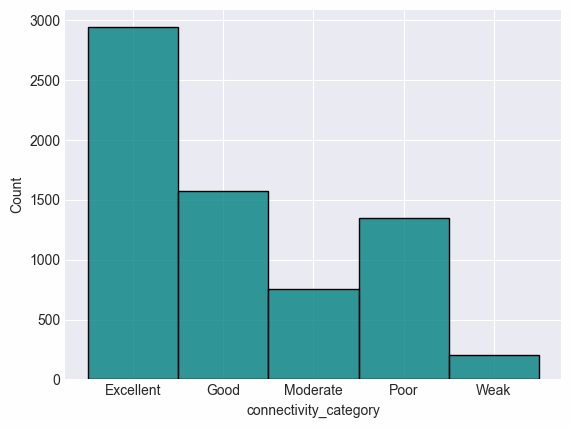

In [30]:
sns.histplot(df, x="connectivity_category", bins=30, color = "teal", alpha = 0.8)

In [31]:
df.drop(columns=["ftth", "hfc", "reception_30mbps", "reception_100mbps", "reception_1gbps", "4g", "5g", "5g_3,5ghz", 'vdsl_30mbps','fixed_wireless'], axis=1, inplace=True)

# 3. Industry

In [32]:
df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']].describe()

,n_industry,n_construction,n_info_communications,n_financial_insurance,n_real_estate,n_professional_technical,n_eduation_health_social,n_other
count,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000,6826.000000
mean,4.191474,6.927776,0.055669,0.093906,0.288602,0.916789,0.491210,0.800322
std,10.031502,14.688858,0.647661,0.942664,2.604686,6.979265,3.767258,5.692548
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,162.000000,145.000000,16.000000,21.000000,70.000000,129.000000,63.000000,117.000000


In [33]:
title = "Villages in Spain"

lats = df.latitude
lons = df.longitude

fig = px.scatter_map(df, 
                     lat=lats, 
                     lon=lons,
                     hover_data=["municipality"],
                     color_continuous_scale=px.colors.carto.Aggrnyl,
                     zoom=5,
                     size_max=50  # Increase max size of markers
                     )
# Adjust the size reference to make small points more visible
fig.update_traces(marker=dict(sizeref=1000))  # Decrease this value to make points larger

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000, width=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":50,"t":50,"l":50,"b":50})
fig.update_layout(
    coloraxis_colorbar=dict(title='asdf')
)
fig.update_layout(title="Major in Spain ")



fig.show()

In [34]:
df[['latitude', 'longitude']].describe()

,latitude,longitude
count,6827.000000,6827.000000
mean,40.976320,-3.063762
std,1.585844,2.583573
min,28.100000,-15.583330
25%,40.156135,-5.070429
50%,41.267270,-3.241523
75%,42.161320,-1.353930
max,43.769200,3.278389


In [35]:
bins = {'lat': np.arange(df['latitude'].min(), df['latitude'].max(), 0.5), 'lon': np.arange(df['longitude'].min(), df['longitude'].max(), 0.5)}

1. make bins of lat, long
2. sort pueplos into the bins
3rd -> for each pueblo: have a look at 1 lower and 1 higer (lat, long)

In [36]:
df = df.copy()

df['lat_bin'] = pd.cut(df['latitude'], bins['lat'], labels=False, include_lowest=True)
df['lon_bin'] = pd.cut(df['longitude'], bins['lon'], labels=False, include_lowest=True)
df['lat_bin'] = df['lat_bin'].fillna(-1).astype(int)
df['lon_bin'] = df['lon_bin'].fillna(-1).astype(int)
df


,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,...,koppen_climate,description,number_of_houses,count_of_stations,suburban_train,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin
0,1001,Alegría-Dulantzi,Álava,País Vasco,561.68570,-2.513507,42.84149,615,250,268,...,Cfb,Oceanic Climate - Mild temperatures and consis...,1275.0,NaN,NaN,Medium,0.9285,Excellent,29,26
2,1003,Aramaio,Álava,País Vasco,381.87970,-2.566000,43.05400,218,113,108,...,Cfb,Oceanic Climate - Mild temperatures and consis...,738.0,NaN,NaN,Medium,0.8480,Excellent,29,26
3,1004,Artziniega,Álava,País Vasco,196.98080,-3.128209,43.12220,352,127,146,...,Cfb,Oceanic Climate - Mild temperatures and consis...,1099.0,NaN,NaN,Medium,0.9175,Excellent,30,24
4,1006,Armiñón,Álava,País Vasco,463.58150,-2.872574,42.72305,42,20,18,...,Csb,"Mediterranean Warm Summer - Cooler, wet winter...",180.0,NaN,NaN,Small,0.8730,Excellent,29,25
5,1009,Asparrena,Álava,País Vasco,631.65200,-2.321000,42.89567,229,110,145,...,Cfb,Oceanic Climate - Mild temperatures and consis...,1093.0,1.0,0.0,Medium,0.8860,Excellent,29,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8017,46180,Novetlè,Valencia,Valencia,135.76780,-0.547913,38.97980,150,61,75,...,NaN,NaN,464.0,NaN,NaN,Medium,0.9385,Excellent,21,30
8020,12072,Llucena/Lucena del Cid,Castellón,Valencia,564.10640,-0.279997,40.13850,176,98,137,...,NaN,NaN,1351.0,NaN,NaN,Medium,0.8985,Excellent,24,30
8021,12901,"Alqueries, les/Alquerías del Niño Perdido",Castellón,Valencia,25.46689,-0.113446,39.89653,827,327,409,...,NaN,NaN,2236.0,NaN,NaN,Big,0.9575,Excellent,23,30
8023,46176,Montroi/Montroy,Valencia,Valencia,142.12200,-0.614546,39.34037,563,217,394,...,NaN,NaN,2755.0,NaN,NaN,Big,0.5365,Moderate,22,29


In [37]:
from geopy.distance import geodesic
lon_max = df['lon_bin'].max()
lat_max = df['lat_bin'].max()

def get_towns_in_vicinity(row: pd.Series, distance):
    cmuns = []
    # Properly handle edge bins and include all surrounding quadrants
    for idx in range(max(0, row['lon_bin'] - 1), min(lon_max + 1, row['lon_bin'] + 2)):
        for idy in range(max(0, row['lat_bin'] - 1), min(lat_max + 1, row['lat_bin'] + 2)):
            cmuns.extend(df.loc[(df['lat_bin'] == idy) & (df['lon_bin'] == idx), 'cmun'].tolist())
    # Get the origin coordinates
    origin = (row['latitude'], row['longitude'])
    # Select rows for comparison
    new_df = df[df["cmun"].isin(cmuns)].copy()
    # Remove the current town if necessary
    new_df = new_df[new_df['cmun'] != row['cmun']]
    # Calculate distances
    new_df["distance"] = [geodesic(origin, (lat, lon)).kilometers for lat, lon in zip(new_df["latitude"], new_df["longitude"])]
    new_df = new_df[new_df["distance"] < distance]
    return new_df['cmun'].to_list()


In [38]:
# Apply the function
df['towns_in_vicinity'] = df.apply(lambda x: get_towns_in_vicinity(x, 40), axis=1)

In [39]:
df_economy = df[['n_industry', 'n_construction',
       'n_info_communications', 'n_financial_insurance', 'n_real_estate',
       'n_professional_technical', 'n_eduation_health_social', 'n_other']]

# Define weights for each economic indicator (summing to 1)
economy_weights = {
    'n_industry': 0.25,
    'n_construction': 0.10,
    'n_info_communications': 0.1,
    'n_financial_insurance': 0.1,
    'n_real_estate': 0.1,
    'n_professional_technical': 0.15,
    'n_eduation_health_social': 0.15,
    'n_other': 0.05
}

# Calculate a weighted economy score using the defined weights
df["economy_score"] = df_economy.multiply(pd.Series(economy_weights)).sum(axis=1)


In [40]:
def combine_economy_scores(row):
    base_score = row["economy_score"]
    vicinity = row["towns_in_vicinity"]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin(vicinity), "economy_score"]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["economy_score_area"] = df.apply(combine_economy_scores, axis=1)

In [47]:
df = df.drop(columns=[col for col in df.columns if col.startswith('n_')])
df = df.sort_values(['latitude', 'longitude'], ascending=False)

# 4. Health

In [49]:
df.columns

Index(['cmun', 'municipality', 'province', 'autonomous_community', 'altitude',
       'longitude', 'latitude', '0-17', '18-24', '25-34', '35-54', '55+',
       'male', 'female', 'total_population', 'nearest_airport',
       'closest_distance_airport', 'nearest_train_station',
       'closest_distance_train', 'closest_distance_hospital',
       'nearest_hospital', 'closest_distance_school', 'nearest_school',
       'koppen_climate', 'description', 'number_of_houses',
       'count_of_stations', 'suburban_train', 'town_size',
       'connectivity_score', 'connectivity_category', 'lat_bin', 'lon_bin',
       'towns_in_vicinity', 'economy_score', 'economy_score_area',
       'closest_distance_hospital_bin', 'closest_distance_school_bin',
       'hospital_distance_score', 'school_distance_score',
       'hospital_score_area', 'school_score_area'],
      dtype='object')

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
df["towns_in_vicinity"] = df["towns_in_vicinity"].apply(
    lambda x: ", ".join(map(str, x)) if isinstance(x, list) else x
)

In [52]:
df.reset_index(drop=True, inplace=True)

In [43]:
# df.to_csv("../../data/processed/2_aggregated_pueblos.csv", index=False)

In [53]:
df['province'].unique()
df[df.towns_in_vicinity.isnull()]

df = df.dropna(subset=['towns_in_vicinity'])

In [54]:
# define bins for the hospital distance (adjust thresholds as needed)
hospital_bins = [df['closest_distance_hospital'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_hospital'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# bin the values into categories
df['closest_distance_hospital_bin'] = pd.cut(df['closest_distance_hospital'], bins=hospital_bins, labels=labels, include_lowest=True)

# apply score based on the bins (10 is best)
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}

df['hospital_distance_score'] = df['closest_distance_hospital_bin'].map(score_mapping)

# second step
def combine_scores(row, column):
    base_score = row[column]
    vicinity = row[column]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin([vicinity]), column]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["hospital_score_area"] = df.apply(lambda row: combine_scores(row, column="hospital_distance_score"), axis=1)

In [55]:
df.drop(columns=["closest_distance_hospital_bin"], axis=1, inplace=True)

# 5. Education

In [ ]:
# define bins for the hospital distance (adjust thresholds as needed)
school_bins = [df['closest_distance_school'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_school'].max()]
labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

# bin the values into categories
df['closest_distance_school_bin'] = pd.cut(df['closest_distance_school'], bins=school_bins, labels=labels, include_lowest=True)

# apply score based on the bins (10 is best)
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}

df['school_distance_score'] = df['closest_distance_school_bin'].map(score_mapping)

# second step
def combine_scores(row, column):
    base_score = row[column]
    vicinity = row[column]
    if vicinity:
        neighbor_scores = df.loc[df["cmun"].isin([vicinity]), column]
        if not neighbor_scores.empty:
            avg_neighbor_score = neighbor_scores.mean()
        else:
            avg_neighbor_score = 0
        return (base_score + avg_neighbor_score) / 2
    else:
        return base_score

df["school_score_area"] = df.apply(lambda row: combine_scores(row, column="school_distance_score"), axis=1)

In [ ]:
df.drop(columns=["closest_distance_school_bin"], axis=1, inplace=True)

# 6. Transport

In [56]:
score_mapping = {
    '<5': 10,
    '5-10': 8,
    '10-15': 6,
    '15-20': 4,
    '20-25': 3,
    '25-30': 2,
    '30+': 1
}


airport_score_mapping = {
    '<10': 10,
    '10-15': 8,
    '15-30': 6,
    '30-50': 4,
    '50-100': 3,
    '100+': 1
}

df_transport = df[['closest_distance_train', 'closest_distance_airport' ]]

train_bins = [df['closest_distance_train'].min() - 0.001, 5, 10, 15, 20, 25, 30, df['closest_distance_train'].max()]
train_labels = ['<5', '5-10', '10-15', '15-20', '20-25', '25-30', '30+']

airport_bins = [df['closest_distance_airport'].min() - 0.001, 10, 15, 30, 50, 100, df['closest_distance_airport'].max()]
airport_labels = ['<10', '10-15', '15-30', '30-50', '50-100', '100+']

# bin the train and airport distances using the provided bins and labels
df['train_distance_bin'] = pd.cut(df['closest_distance_train'], bins=train_bins, labels=train_labels, include_lowest=True)
df['airport_distance_bin'] = pd.cut(df['closest_distance_airport'], bins=airport_bins, labels=airport_labels, include_lowest=True)

# map the binned categories to scores using the score_mapping
df['train_distance_score'] = df['train_distance_bin'].map(score_mapping)
df['airport_distance_score'] = df['airport_distance_bin'].map(airport_score_mapping)

# compute a weighted transportation score (equal weight is used here; adjust weights if needed)
df['transport_score'] = (pd.to_numeric(df['train_distance_score']) + pd.to_numeric(df['airport_distance_score'])) / 2



In [57]:
df.sample(6)

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,count_of_stations,suburban_train,town_size,connectivity_score,connectivity_category,lat_bin,lon_bin,towns_in_vicinity,economy_score,economy_score_area,closest_distance_school_bin,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_bin,airport_distance_bin,train_distance_score,airport_distance_score,transport_score
5035,10039,Cadalso,Cáceres,Extremadura,448.09280,-6.541749,40.23775,20,34,35,85,232,209,197,406,Aeropuerto de Salamanca,118.324652,Ciudad Rodrigo,41.206311,27.388585,Hospital Ciudad De Coria,0.108356,C.R.A. Almenara,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",385.0,NaN,NaN,Small,0.966,Excellent,24,18,"10003, 10005, 10006, 10016, 10038, 10040, 1004...",0.00,0.359000,<5,2,10,1.0,5.0,30+,100+,1,1,1.0
6586,18011,Alfacar,Granada,Andalucía,915.64510,-3.570654,37.23657,1031,462,771,1661,1888,2952,2861,5813,Aeropuerto de Granada - Jaén F.G.L.,19.267163,Granada,6.752828,6.240339,Hospital Universitario San Cecilio,0.195976,C.E.I.P. Las Encinas,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",2838.0,NaN,NaN,Big,0.978,Excellent,18,24,"18001, 18005, 18007, 18024, 18025, 18027, 1802...",26.45,15.014726,<5,8,10,4.0,5.0,5-10,15-30,8,6,7.0
5616,16237,Valverdejo,Cuenca,Castilla La Mancha,865.12900,-2.024116,39.61505,6,3,8,17,54,45,43,88,Aeropuerto de Albacete,75.168904,Arguisuelas,30.754688,52.267480,Hospital Virgen De La Luz,20.033749,Colégio Público C.R.A Ribera del Júcar,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",102.0,NaN,NaN,Very Small,0.630,Good,23,27,"2078, 16003, 16004, 16015, 16017, 16024, 16026...",0.00,0.634701,20-25,1,3,0.5,1.5,30+,50-100,1,3,2.0
2191,25129,Llobera,Lleida,Cataluña,846.80840,1.472779,41.95104,32,13,18,55,90,118,90,208,Aeropuerto de Sabadell,71.034204,Seguers-Sant Pere Sallavinera,24.079821,35.841016,Hospital Comarcal De Sant Bernabé,3.309892,Escola de Llobera - ZER El Solsonès,Cfb,Oceanic Climate - Mild temperatures and consis...,76.0,NaN,NaN,Small,0.147,Poor,27,34,"8002, 8008, 8011, 8018, 8031, 8036, 8038, 8045...",0.00,0.970380,<5,1,10,0.5,5.0,20-25,50-100,3,3,3.0
3996,37206,Moríñigo,Salamanca,Castilla León,803.54930,-5.413916,40.96955,4,3,8,22,51,48,40,88,Aeropuerto de Salamanca,7.780947,Babilafuente,1.436213,21.400180,Hospital General De La Santísima Trinidad,1.301522,Filiberto Villalobos,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",95.0,NaN,NaN,Very Small,0.615,Good,25,20,"5026, 5029, 5033, 5034, 5043, 5044, 5048, 5060...",0.00,0.224375,<5,3,10,1.5,5.0,<5,<10,10,10,10.0
5920,46113,Daimús,Valencia,Valencia,12.69039,-0.153838,38.97000,499,243,352,1073,1362,1781,1748,3529,Aeropuerto de Valencia,64.349504,La Pobla Del Duc,26.002694,1.576658,Hospital Francesc De Borja De Gandia,0.314447,Mestre Rafael Noguera,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",6062.0,NaN,NaN,Big,0.960,Excellent,21,30,"3003, 3006, 3008, 3016, 3017, 3020, 3022, 3026...",7.85,5.482463,<5,10,10,5.0,5.0,25-30,50-100,2,3,2.5


In [58]:
df.drop(columns=[col for col in df.columns if col.endswith('_bin')], inplace=True)

# 7. Town Age

In [ ]:
# Define age group columns
age_groups = ["0-17", "18-24", "25-34", "35-54", "55+"]

# Sum only the age group columns
df["total_population"] = df[age_groups].sum(axis=1)

# Compute percentages for each age group
for col in age_groups:
    df[col + "_pct"] = (df[col] / df["total_population"]) * 100

In [ ]:
# Define weights for age score
weights = {
    "0-17_pct": 0.5,
    "18-24_pct": 1.0,
    "25-34_pct": 2.0,
    "35-54_pct": 1.5,
    "55+_pct": -1.5  # Negative because higher elderly % means aging town
}

# Compute weighted score
df["age_score"] = sum(df[col] * weight for col, weight in weights.items())

df

,cmun,municipality,province,autonomous_community,altitude,longitude,latitude,0-17,18-24,25-34,35-54,55+,male,female,total_population,nearest_airport,closest_distance_airport,nearest_train_station,closest_distance_train,closest_distance_hospital,nearest_hospital,closest_distance_school,nearest_school,koppen_climate,description,number_of_houses,count_of_stations,suburban_train,town_size,connectivity_score,connectivity_category,towns_in_vicinity,economy_score,economy_score_area,hospital_distance_score,school_distance_score,hospital_score_area,school_score_area,train_distance_score,airport_distance_score,transport_score,0-17_pct,18-24_pct,25-34_pct,35-54_pct,55+_pct,age_score
0,15044,Mañón,A Coruña,Galicia,122.750900,-7.685581,43.76920,93,35,98,290,707,605,618,1223,Aeropuerto de A Coruña,76.248645,Neda,48.964787,29.303684,Hospital Publico Da Mariña (*),3.478347,CEIP Francisco López Estrada,Cfb,Oceanic Climate - Mild temperatures and consis...,1164.0,1.0,0.0,Medium,0.4710,Moderate,,0.00,0.000000,2,10,1.0,5.0,1,3,2.0,7.604252,2.861815,8.013083,23.712183,57.808667,-28.454620
1,27064,"Vicedo, O",Lugo,Galicia,13.503120,-7.672058,43.73336,138,84,109,404,855,772,818,1590,Aeropuerto de A Coruña,74.446868,Neda,47.507306,26.746659,Hospital Publico Da Mariña (*),0.576536,CEIP do Vicedo,Cfb,Oceanic Climate - Mild temperatures and consis...,1902.0,3.0,0.0,Medium,0.5340,Moderate,,0.00,0.000000,2,10,1.0,5.0,1,3,2.0,8.679245,5.283019,6.855346,25.408805,53.773585,-19.213836
2,15901,Cariño,A Coruña,Galicia,9.662794,-7.877766,43.73265,354,190,261,954,1933,1815,1877,3692,Aeropuerto de A Coruña,62.563567,Neda,34.896649,36.616771,Hospital Naval,0.272624,CEIP Manuel Fraga Iribarne,Cfb,Oceanic Climate - Mild temperatures and consis...,3274.0,NaN,NaN,Big,0.7010,Good,,8.70,8.700000,1,10,0.5,5.0,1,3,2.0,9.588299,5.146262,7.069339,25.839653,52.356446,-15.696100
3,15061,Ortigueira,A Coruña,Galicia,12.530200,-7.851941,43.68634,458,261,393,1362,2974,2588,2860,5448,Aeropuerto de A Coruña,60.196344,Neda,32.757978,35.197582,Hospital Naval,0.074362,ESMU Municipal de Ortigueira,Cfb,Oceanic Climate - Mild temperatures and consis...,5881.0,6.0,1.0,Big,0.4630,Moderate,,23.25,23.250000,1,10,0.5,5.0,1,3,2.0,8.406755,4.790749,7.213656,25.000000,54.588840,-20.961821
4,27025,Xove,Lugo,Galicia,61.076240,-7.512421,43.68557,379,164,304,1070,1381,1713,1585,3298,Aeropuerto de A Coruña,81.885335,Neda,56.477784,12.862127,Hospital Publico Da Mariña (*),0.261546,ESMU Municipal de Xove,Cfb,Oceanic Climate - Mild temperatures and consis...,2166.0,4.0,0.0,Big,0.9035,Excellent,,4.15,4.150000,6,10,3.0,5.0,1,3,2.0,11.491813,4.972711,9.217708,32.443905,41.873863,15.009096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6822,11025,Paterna de Rivera,Cádiz,Andalucía,125.970500,-5.866053,36.52333,966,460,630,1791,1669,2865,2651,5516,Aeropuerto de Jerez,30.131548,Jimena De La Frontera,40.229955,25.564774,Hospital Universitario De Puerto Real,0.130360,C.E.PR. Perafán de Rivera,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",2385.0,NaN,NaN,Big,0.9660,Excellent,"11001, 11003, 11017, 11902",11.95,9.331250,2,10,1.0,5.0,1,4,2.5,17.512690,8.339376,11.421320,32.469181,30.257433,43.255983
6823,29056,Gaucín,Málaga,Andalucía,609.396100,-5.317524,36.51830,250,101,139,450,652,825,767,1592,Helipuerto de Algeciras,44.614424,Gaucin,6.636714,16.663017,Hospiten Estepona,0.408770,C.E.I.P. Guzmán el Bueno,Csa,"Mediterranean Hot Summer - Hot, dry summers an...",1394.0,NaN,NaN,Medium,0.8270,Excellent,"11001, 11003, 11009, 11011, 11013, 11018, 1101...",3.75,3.178333,4,10,2.0,5.0,8,4,6.0,15.703518,6.344221,8.731156,28.266332,40.954774,12.625628
6824,11001,Alcalá de los Gazules,Cádiz,Andalucía,158.396300,-5.723718,36.46045,793,445,670,1564,1759,2689,2542,5231,Aeropuerto de Jerez,43.686920,Jimena De La Frontera,26.262065,37.170428,Hospital Quirón Campo De Gibraltar,0.029

In [ ]:
def categorize_by_age_score(score):
    if score > 50:
        return "Very Young Town"
    elif score > 30:
        return "Young & Growing"
    elif score > 10:
        return "Balanced Town"
    elif score > 0:
        return "Aging Town"
    else:
        return "Highly Aging Town"

# Apply final categorization
df["final_age_category"] = df["age_score"].apply(categorize_by_age_score)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Highly Aging Town'),
  Text(1, 0, 'Balanced Town'),
  Text(2, 0, 'Aging Town'),
  Text(3, 0, 'Young & Growing'),
  Text(4, 0, 'Very Young Town')])

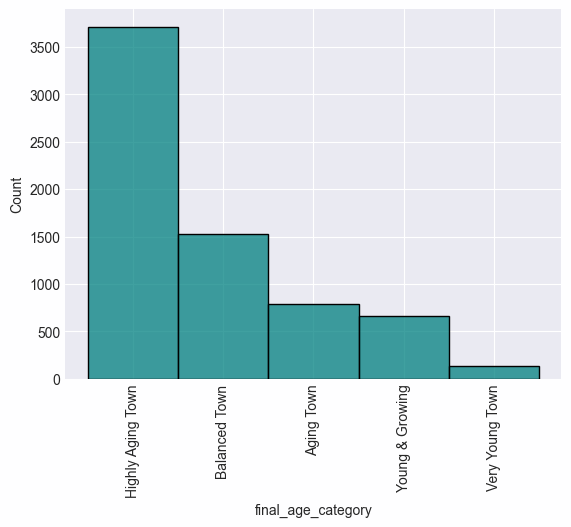

In [64]:
sns.histplot(df["final_age_category"], color="teal")
plt.xticks(rotation=90)